In [1]:
# Import
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import sys 
import pathlib
import importlib
import os

os.chdir(str(pathlib.Path.cwd().parent))

import scraper
scraper = importlib.reload(scraper)

In [ ]:
# viz 
df = pd.read_pickle("outputs/all_listings.pkl")
df["rent_FLOAT"] = df["rent"].map(lambda val : float(re.search(r"[\d,.]*", val)[0].replace(",", "")))
df["size_INT"] = df["size"].map(lambda val : int(val.replace(" m2", "")) if val else None)
df["city"] = df["location"].map(
    lambda val : re.search(r',\s*(.*)', val).group(1) if re.search(r',\s*(.*)', val) else None)

In [2]:
desc_df = pd.read_pickle("outputs/all_listings_.pkl")

In [3]:
desc_df

,link,rent,size,property_type,location,title,street,description,seo
0,/rooms/amsterdam-zuideramstel/8524586,"1,200 EUR",15 m2,room,"Amsterdam Zuideramstel, Amsterdam","\r\n Room for rent, Amsterdam Zuide...","See streetname[xxxxxxxxxxxxx], Amsterdam Zuide...",\r\n\r\n It's a Room in a shared appart...,"\nInformation and data\n\nThis room for rent, ..."
1,/apartments/amsterdam-westpoort/12509021,"2,500 EUR",44 m2,apartment,"Amsterdam Westpoort, Amsterdam","\r\n Apartment for rent, Amsterdam ...","See streetname[xxxxxxxxxxxxx], Amsterdam Westp...",\r\n\r\n For Rent: Beautiful New 44 m2 ...,\nInformation and data\n\nThis apartment for r...
2,/rooms/amsterdam-amsterdam-zuidoost/12475024,850 EUR,None,Room,"Amsterdam Amsterdam-Zuidoost, Amsterdam","\r\n Room for rent, Amsterdam Amste...","See streetname[xxxxxxxxxxxxx], Amsterdam Amste...",\r\n\r\n Room Available to rent Immidia...,"\nInformation and data\n\nThis room for rent, ..."
3,/apartments/amsterdam-centrum/12420623,"3,100 EUR",85 m2,apartment,"Amsterdam Centrum, Amsterdam","\r\n Apartment for rent, Amsterdam ...","See streetname[xxxxxxxxxxxxx], Amsterdam Centrum",\r\n\r\n Fantastic fully furnished apar...,\nInformation and data\n\nThis apartment for r...
4,/apartments/amsterdam-centrum/7892233,"1,000 EUR",50 m2,apartment,"Amsterdam Centrum, Amsterdam","\r\n Apartment for rent, Amsterdam ...","See streetname[xxxxxxxxxxxxx], Amsterdam Centrum",\r\n\r\n Located in a very central posi...,\nInformation and data\n\nThis apartment for r...
...,...,...,...,...,...,...,...,...,...
13,/houses/eindhoven/12284554,"2,475 EUR",115 m2,house,"Eindhoven, North Brabant","\r\n House for rent, Eindhoven, Nor...","See streetname[xxxxxxxxxxxxx], Eindhoven","\r\n\r\n House for rent in Eindhoven, N...",\nInformation and data\n\nThis house for rent ...
14,/houses/eindhoven/12269772,"1,895 EUR",167 m2,house,"Eindhoven, North Brabant","\r\n House for rent, Eindhoven, Nor...","See streetname[xxxxxxxxxxxxx], Eindhoven","\r\n\r\n House for rent in Eindhoven, N...",\nInformation and data\n\nThis house for rent ...
15,/apartments/eindhoven/12279927,"1,900 EUR",84 m2,apartment,"Eindhoven, North Brabant","\r\n Apartment for rent, Eindhoven,...","See streetname[xxxxxxxxxxxxx], Eindhoven",\r\n\r\n Apartment for rent in Eindhove...,\nInformation and data\n\nThis apartment for r...
16,/apartments/eindhoven/11836853,900 EUR,11 m2,apartment,"Eindhoven, North Brabant","\r\n Apartment for rent, Eindhoven,...","See streetname[xxxxxxxxxxxxx], Eindhoven",\r\n\r\n Apartment for rent in Eindhove...,\nInformation and data\n\nThis apartment for r...


c:\Users\PC\anaconda3\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\anaconda3\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\anaconda3\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\anaconda3\envs\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


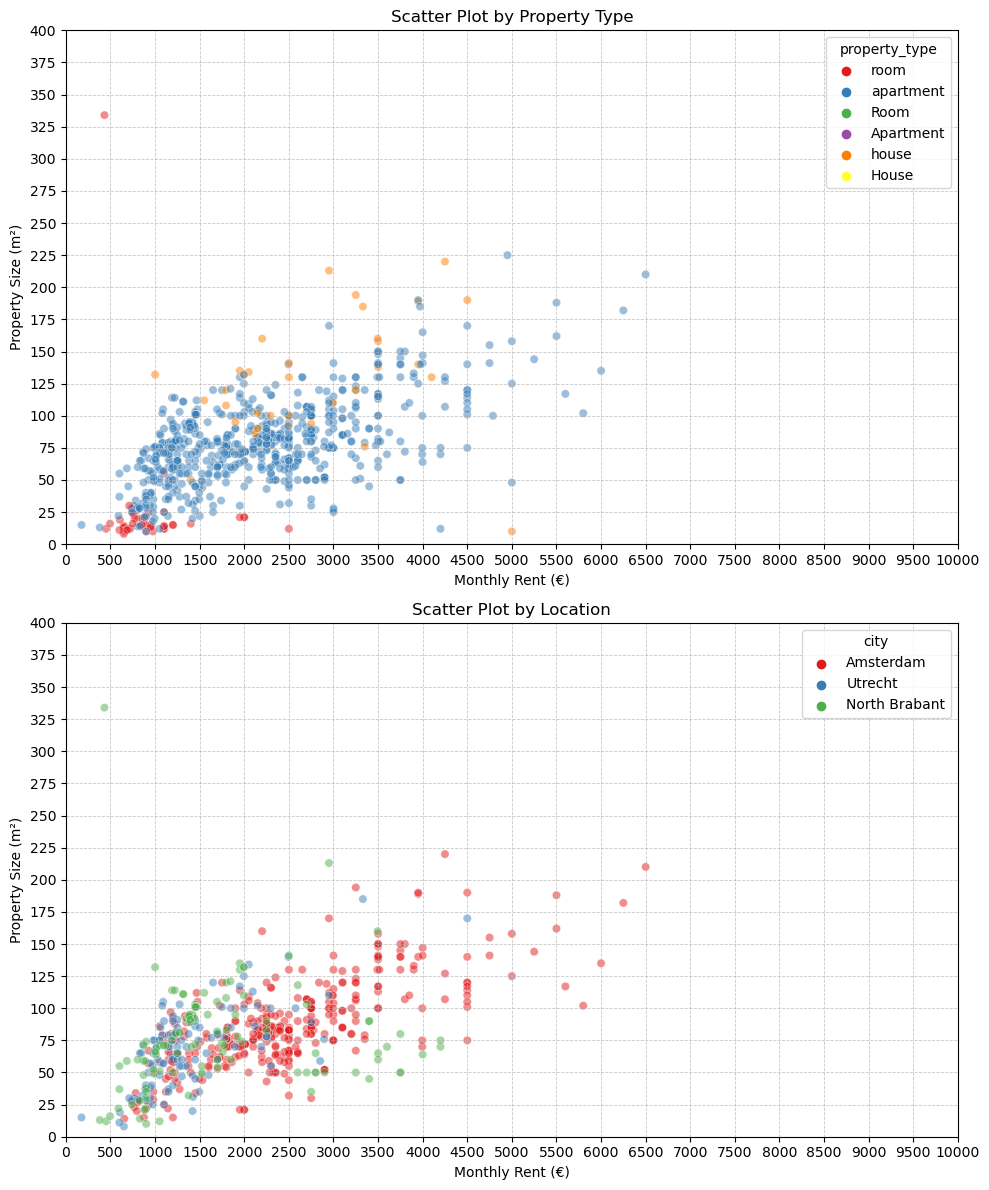

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 12))

# First scatter plot
plt.subplot(2, 1, 1)
sns.scatterplot(data=df, 
                x="rent_FLOAT", 
                y="size_INT", 
                hue="property_type", 
                palette="Set1", 
                alpha=0.5)
plt.xlim(0, 10000)
plt.ylim(0, 400)
plt.xticks(np.arange(0, 10001, 500))  # X-axis tick every 500
plt.yticks(np.arange(0, 401, 25))     # Y-axis tick every 50
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.xlabel('Monthly Rent (€)')
plt.ylabel('Property Size (m²)')
plt.title('Scatter Plot by Property Type')

# Second scatter plot
plt.subplot(2, 1, 2)
sns.scatterplot(data=df, 
                x="rent_FLOAT", 
                y="size_INT", 
                hue="city", 
                palette="Set1", 
                alpha=0.5)
plt.xlim(0, 10000)
plt.ylim(0, 400)
plt.xticks(np.arange(0, 10001, 500))  # X-axis tick every 500
plt.yticks(np.arange(0, 401, 25))     # Y-axis tick every 50
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.xlabel('Monthly Rent (€)')
plt.ylabel('Property Size (m²)')
plt.title('Scatter Plot by Location')

plt.tight_layout()
plt.show()

In [113]:
import plotly.express as px

fig = px.scatter(
    df,
    x="rent_FLOAT",
    y="size_INT",
    color="property_type",
    symbol="city",
    hover_data=["city", "property_type"],
    title="Interactive Scatter Plot of Rent vs. Size",
    opacity=0.5,
    size_max=5,  # Smaller marker size
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.update_traces(marker=dict(size=4))  # Set smaller size explicitly

fig.update_layout(
    xaxis=dict(
        title="Monthly Rent (€)",
        tickmode='linear',
        tick0=0,
        dtick=500,
        range=[0, 10000]
    ),
    yaxis=dict(
        title="Property Size (m²)",
        tickmode='linear',
        tick0=0,
        dtick=50,
        range=[0, 400]
    ),
    width=800,
    height=500
)